Project: calculate optimal replacement time for a heat exchanger
Failure distribution parameters were calculated on another notebook
Formula to calculate optimal replacement time from reliability engineering book

In [7]:
import numpy as np
import pandas as pd
from scipy.integrate import quad
from scipy.optimize import minimize

Cp = np.random.triangular(1600, 2300, 3000) # Your example values
Cc = np.random.triangular(30000, 50000, 70000) # Your example values

λ = 6.304426520301275  # Scale Example value
k = 2.7360148295580604 # Shape Example value

def Rt(t, λ, k):
    return np.exp(-((t/λ) ** k))

def integrand(t, λ, k):
    return Rt(t, λ, k)

def CPUT(t, Cc, Cp, λ, k):
    integral, error = quad(integrand, 0, t, args=(λ, k))
    return (Cc * (1 - Rt(t, λ, k)) + Cp * Rt(t, λ, k)) / (integral + 1e-9)

res = minimize(lambda t: CPUT(t[0], Cc, Cp, λ, k), x0=0, method='BFGS', options={'disp': True})

print("Optimized replacement time:", res.x[0])

         Current function value: 2218.697804
         Iterations: 42
         Function evaluations: 169
         Gradient evaluations: 79
Optimized replacement time: 1.682855058144927


In [8]:
# Generate your t values
t_values = np.linspace(0.1, 10, 100)

In [9]:
CPUT_values = [CPUT(t, Cc, Cp, λ, k) for t in t_values]
Rt_values = [Rt(t, λ, k) for t in t_values]

# Create a DataFrame
df = pd.DataFrame({
    't': t_values,
    'CPUT': CPUT_values,
    'Rt': Rt_values
})

print(df)

       t          CPUT        Rt
0    0.1  23611.895396  0.999988
1    0.2  11823.241247  0.999921
2    0.3   7909.729274  0.999759
3    0.4   5969.220785  0.999471
4    0.5   4820.986250  0.999027
..   ...           ...       ...
95   9.6   9130.202107  0.042432
96   9.7   9157.043698  0.038746
97   9.8   9182.051190  0.035322
98   9.9   9205.307274  0.032148
99  10.0   9226.894743  0.029210

[100 rows x 3 columns]


In [10]:
import matplotlib.pyplot as plt

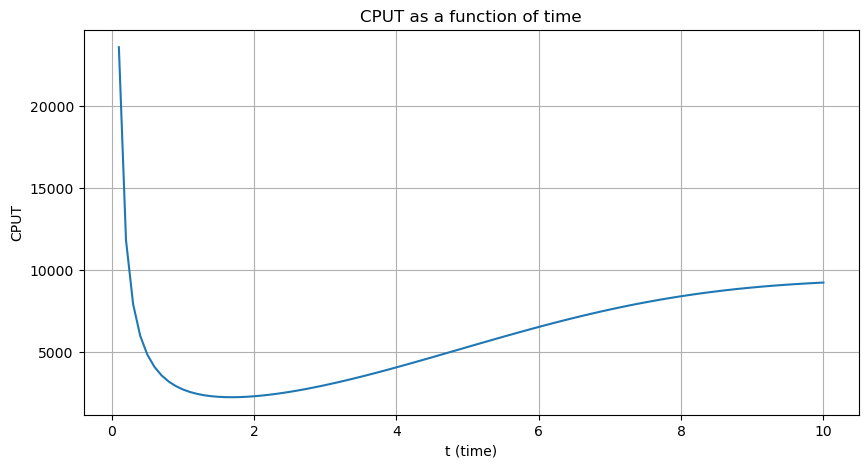

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(t_values, CPUT_values)
plt.xlabel('t (time)')
plt.ylabel('CPUT')
plt.title('CPUT as a function of time')
plt.grid(True)
plt.show()